In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import time
import ast

#import plotly. as py
#import plotly.graph_objs as go
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2)

In [2]:
from ete3 import Tree, TreeStyle

In [25]:
n = Tree("pruned_withreference_phyla_cons.nwk")
do = Tree("grouped_all_sorted_domain_EnergyMet.nwk")
ph = Tree("grouped_all_sorted_phylum_EnergyMet.nwk")
sp = Tree("grouped_all_sorted_species_EnergyMet.nwk")

n_s = Tree("grouped_selonly_sorted_names_EnergyMet.nwk")
do_s = Tree("grouped_selonly_sorted_domain_EnergyMet.nwk")
ph_s = Tree("grouped_selonly_sorted_phylum_EnergyMet.nwk")
sp_s = Tree("grouped_selonly_sorted_species_EnergyMet.nwk")


In [14]:
maindir = 'MAGs/CODHACS/bins_IMG/treefiles/'
maindir = 'MAGs/H4MPT/'
maindir = 'MAGs/Mcr/'
maindir = 'MAGs/Mtr/'
name = 'IQ_CODH_all'
name = 'IQ_CODH_noA'
#name = 'IQ_CODH_noAnoE'
name = 'IQ_CODH_all_root'
#name = 'IQ_CODH_noA_root'
#name = 'IQ_CODH_noAnoE_root'
#name = 'beta_only_all_'
#name = 'gamma_only_all_'
name = 'IQ_subunit_delta_root'
name = 'tree_H4MPT_subH_unrooted'
name = 'tree_mcr_gammaroot'
name = 'Verstraete16S_unroot'
name = 'IQ_MtrH_root_2635086075'
name = 'IQ_MtrA_'
tree = Tree(maindir+name+'.treefile')
"""for node in tree.get_descendants():
    if not node.is_leaf() and node.support <= 0.8:
        node.delete()"""
#tree.unroot()
ts = TreeStyle()
ts.show_leaf_name = True


#ts.mode = "c"
#ts.arc_start = -90 # 0 degrees = 3 o'clock
#ts.arc_span = 180
tree.show(tree_style = ts)
tree.render(maindir+name+"_TreeComplete.pdf", w = 500, units = "px", tree_style = ts)

{'faces': [[5.691056910569106,
   0.8130081300813008,
   499.1869918699187,
   16.260162601626014,
   1,
   '2518743524_Candidatus_Methanoperedens_nitroreducens_ANME-2d__ANME_V9_SC___ANME_V9_SC_'],
  [32.749941184166296,
   16.260162601626014,
   279.9044127288817,
   31.70731707317073,
   8,
   '637959279_Methanococcoides_burtonii_DSM_6242'],
  [31.79012646384775,
   31.70731707317073,
   265.12345979718106,
   47.15447154471545,
   9,
   '2642592176_Methanococcoides_vulcani_SLH_33'],
  [30.69198286560212,
   47.15447154471545,
   293.29360888186227,
   62.60162601626016,
   10,
   '2705563890_Methanohalophilus_euhalobius_WG-1MB'],
  [30.4192149899584,
   62.60162601626016,
   284.0777515753242,
   78.04878048780488,
   12,
   '2658350880_Methanosarcina_sp._Bin_10_Ga0115071'],
  [32.03689380673595,
   78.04878048780488,
   268.6222596603945,
   93.4959349593496,
   14,
   '2515106371_Methanolobus_tindarius_DSM_2278'],
  [31.84416076274441,
   93.4959349593496,
   252.16936401477693,
 

In [77]:
tr = Tree('Tree_Obsidian/June2018_archaeasubtrees/UNI56_subtreeMarscVersGeoCren_mafftBMGE.concat.faa.contree')
#tr = Tree('Tree_Obsidian/June2018_archaeasubtrees/gtdbarc_subtreeMarscVersGeoCren_mafftBMGE.concat.faa.contree')
ancestor = tr.get_common_ancestor("IMG2264867066","IMG2264867064")
tr.set_outgroup('IMG2264867064')

In [78]:
len(greyscale)

77

In [82]:
ts = TreeStyle()
ts.show_leaf_name = True
#ts.mode = "c"
#ts.arc_start = -90 # 0 degrees = 3 o'clock
#ts.arc_span = 180
ts.scale =  220
tr.show(tree_style = ts)
tr.render('Tree_Obsidian/June2018_archaeasubtrees/UNI56_straight.pdf', w = 1000, units = "px", tree_style = ts)

{'faces': [[1.5064593510928248,
   100.61204246368254,
   10.545215457649773,
   124.71539208116775,
   0,
   '1'],
  [172.2403021186081,
   1.5064593510928248,
   315.3539404724265,
   30.129187021856495,
   1,
   'IMG2264867064'],
  [158.68216795877268,
   185.40626174089044,
   167.72092406532963,
   209.50961135837562,
   2,
   '1'],
  [374.4273818273983,
   30.129187021856495,
   517.5410201812166,
   58.75191469262017,
   3,
   'IMG2264867065'],
  [194.66045457393028,
   326.37197262454254,
   212.73796678704417,
   350.47532224202774,
   4,
   '87'],
  [498.1416883617537,
   58.75191469262017,
   641.2553267155721,
   87.37464236338384,
   5,
   'IMG2721755895'],
  [241.96131980108856,
   579.6806667210831,
   260.03883201420246,
   603.7840163385682,
   6,
   '86'],
  [321.98007179902123,
   115.99737003414751,
   340.0575840121351,
   140.10071965163272,
   7,
   '92'],
  [665.8202247072933,
   87.37464236338384,
   808.9338630611117,
   115.99737003414751,
   8,
   'IMG270874

In [3]:
from ete3 import Tree, faces, CircleFace, TreeStyle, NodeStyle, TextFace
import ete3 as ete

tree='Tree_Obsidian/Subtrees/UNI56_New_phylum_mafftBMGE.concat.faa.contree'
# taxon lookup
defin='Tree_Obsidian/TreesV3/allarcheaMarch2018_V3/archaea_March2018.lookup'
# two columns, genome short name tab name to be displayed in tree  
defin = '/home/bojk/Data/Tree_Obsidian/June2018_archaea/archaea_March2018.lookup'
# additional metadata, GC%, genome size
metad='Tree_Obsidian/TreesV3/allarcheaMarch2018_V3/archaea_March2018_2.GCLen.csv'

# greyscale for GC%
greyscale = ['#F9F9F9','#F4F4F4','#EFEFEF','#EAEAEA','#E4E4E4','#DFDFDF','#DADADA','#D5D5D5','#D0D0D0','#CACACA','#C5C5C5','#C0C0C0','#BBBBBB','#B6B6B6','#B0B0B0','#ABABAB','#A6A6A6','#A1A1A1','#9C9C9C','#969696','#919191','#8C8C8C','#878787','#828282','#7C7C7C','#777777','#727272','#6D6D6D','#686868','#626262','#5D5D5D','#585858','#535353','#4E4E4E','#484848','#434343','#3E3E3E','#393939','#343434','#2E2E2E','#292929','#242424','#1F1F1F','#1A1A1A','#141414','#0F0F0F','#0A0A0A','#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505']

# Functions

def get_defs(definfile):
    """
    Read metadata
    """
    nameshash={}    
    colorhash={}
    outgroup=[]
    support='yes'
    with open(definfile, "r") as infile:
        for line in infile:
            line = line.strip()
            if "\t" in line:
                nameshash[line.split("\t")[0]] = line.split("\t")[1]
            elif line.startswith("color:"):
                for x in line.split(":")[2].split():
                    colorhash[x] = line.split(":")[1]
            elif line.startswith("outgroup:"):
                outgroup = line.split(":")[1].split()
            elif line.startswith("support:"):
                support = line.split(":")[1]
    return nameshash, colorhash, outgroup, support


def FS_layout(node):
    """
    Plotting params
    """
    node.img_style["size"] = 0
    color = "black"
    if node.is_leaf():
        taxonname = node.taxname.split("|")[0]
        if taxonname in colorhash and taxonname in nameshash:
            color = colorhash[node.taxname]
            taxonNode = ete.faces.TextFace(nameshash[taxonname], 
                                           fgcolor = colorhash[taxonname], 
                                           fsize = 100, fstyle = 'bold')
            ete.faces.add_face_to_node(taxonNode, node, 0)
        else:
            color= "black"
            taxonNode = ete.faces.TextFace(nameshash[taxonname], 
                                           fgcolor = "black", fsize = 100, fstyle = 'bold')
            ete.faces.add_face_to_node(taxonNode, node, 0)

        if taxonname in genomesize_dic:
            C0 = CircleFace(radius = 10, color = 'white', style = "circle")
            C1 = CircleFace(radius = int(float(genomesize_dic[taxonname])/30000), 
                            color = greyscale[int(float(gc_dic[taxonname])*100-10)], 
                            style = "circle")
            C0.opacity = 1
            C1.opacity = 1
            ete.faces.add_face_to_node(C0, node, 0, position="branch-right", aligned=True)
            ete.faces.add_face_to_node(C1, node, 1, position="branch-right", aligned=True)
    else:
        common_name = list(node2taxnames[node])[0]
        color = colorhash.get(str(common_name), "black")

    if "support" in node.features and support == "yes":
        if node.support < 1:
            supportvalue = ete.faces.TextFace(str(node.support).replace(".0",""), 
                                             fgcolor = "black", 
                                             fsize = 60)
            ete.faces.add_face_to_node(supportvalue, node, 0, position="branch-right")
                    
    node.img_style["fgcolor"] = color
    node.img_style["vt_line_color"] = color
    
    node.img_style["hz_line_color"] = color
    node.img_style['hz_line_width'] = 20
    node.img_style['vt_line_width'] = 20


In [15]:
# Read tree and metadata
tree='Tree_Obsidian/Subtrees/UNI56_Verstraetearchaeota_mafftBMGE.concat.faa.contree'
tree='Tree_Obsidian/Subtrees/UNI56_Bathyarchaeota_mafftBMGE.concat.faa.contree'
#tree='Tree_Obsidian/Subtrees/UNI56_New_phylum_mafftBMGE.concat.faa.contree'
tree='Tree_Obsidian/Subtrees/UNI56_Desulfurococcales_III_mafftBMGE.concat.faa.contree'
tree = 'MAGs/CODHACS/faasep/gamma_.treefile'
tree = 'Tree_Obsidian/June2018_archaeasubtrees/UNI56_subtreeMarscVersGeoCren_mafftBMGE.concat.faa.contree'
tree = 'Tree_Obsidian/Tree_TACK_Aug_2018/TACK_tree/UNI56_genomesV6_mafftBMGE.concat.faa.contree'
tree = 'Tree_Obsidian/TreeOPbacteria_Aug2018/aquificae_tree/UNI56_aquificae_mafftBMGE.concat.faa.contree'
gclencompl = '/home/bojk/Data/Tree_Obsidian/June2018_archaea/UNI56_subtreeMarscVersGeoCren_mafftBMGE.concat.FTWAG.lenGCcompl2'
defin = '/home/bojk/Data/Tree_Obsidian/June2018_archaea/archaea_March2018.lookup'
defin = 'Tree_Obsidian/TreeOPbacteria_Aug2018/aquificae_tree/aquificae.lookup'
nameshash, colorhash, outgroup, support, a, am, ad = get_defs(defin,gclencompl)

genomesize_dic = {}
gc_dic = {}
UNI56_dic = {}

with open(metad, "r") as infile:
    for line in infile:
        line = line.strip()
        genomesize_dic[line.split("\t")[0]] = line.split("\t")[2]
        gc_dic[line.split("\t")[0]] = line.split("\t")[1]

t = Tree(tree)

# Get outgroup
#outgroup = ['IMG2264867066','IMG2264867064','IMG2264867065','IMG2721755895'] #these are DPANN used for the TACK tree
outgroup = ['IMG642487181','IMG2579779163','IMG2657245176','IMG2657245267','IMG2585428042',
           'IMG2264867129','IMG2756170248','IMG2264867084','IMG2639762628','IMG2645728167',
           'IMG2517572018','IMG2527291514']
allleaves=[]
for node in t.traverse():
    if node.is_leaf():
        allleaves.append(node.name)

finaloutgroup=[]
for x in allleaves:
    if x.split("|")[0] in outgroup:
        finaloutgroup.append(x)

if len(finaloutgroup) >= 1:
    ancestor = t.get_common_ancestor(finaloutgroup)
    #ancestor = 'IMG2264867064'
    t.set_outgroup(ancestor)

# Plot the tree
#ancestor = 'IMG2264867064'
#t.set_outgroup(ancestor)

t.dist = 0 # do not show root branch
t.ladderize()
ts = TreeStyle()
ts.mode = 'r'
ts.arc_start = -90 # 0 degrees = 3 o'clock
ts.arc_span = 180
ts.min_leaf_separation = 0
#ts.layout_fn = FS_layout
ts.show_leaf_name = True
ts.scale = 500
ts.allow_face_overlap = True
ts.guiding_lines_type = 1

for leaf in t.iter_leaves():
    pname = leaf.name
    leaf.add_features(taxname=pname)

# cache the content of internal nodes
node2taxnames = t.get_cached_content(store_attr="taxname")

# render tree
t.render(tree.split(".")[0] + "_circles2.pdf", w = 500, units = "px", tree_style = ts)

{'faces': [[343.2194786414745,
   0.7328253139243168,
   412.8378834642846,
   14.656506278486336,
   3,
   'IMG2579779163'],
  [312.7237919210858,
   14.656506278486336,
   377.2124195464257,
   28.580187243048357,
   6,
   'IMG642487181'],
  [311.80482033008605,
   28.580187243048357,
   381.4232251528962,
   42.503868207610374,
   7,
   'IMG2517572018'],
  [400.6035499233512,
   42.503868207610374,
   470.2219547461613,
   56.4275491721724,
   9,
   'IMG2657245176'],
  [375.7843026555818,
   56.4275491721724,
   445.4027074783919,
   70.35123013673442,
   11,
   'IMG2585428042'],
  [415.24897379453876,
   70.35123013673442,
   484.8673786173489,
   84.27491110129644,
   12,
   'IMG2756170248'],
  [351.75228110952565,
   84.27491110129644,
   421.3706859323358,
   98.19859206585845,
   14,
   'IMG2264867129'],
  [424.6016451016516,
   98.19859206585845,
   494.2200499244617,
   112.12227303042047,
   16,
   'IMG2639762628'],
  [428.5207700377407,
   112.12227303042047,
   498.1391748

In [115]:
tt = {'name': 'root', 'children': [{'name': 'child1', 'branch_length': 3, 'children': []}, {'name': 'child2', 'branch_length': 2, 'children': []}]}
import json
fake_file = json.dumps(tt)
nameshash
outgroup
ancestor
nameshash

{'IMG2263082000': 'Thaumarchaeota|unclassified|unclassified|unclassified|unclassified|unclassified|2263082000',
 'IMG2263082001': 'Thaumarchaeota|unclassified|unclassified|unclassified|unclassified|unclassified|2263082001',
 'IMG2263082002': 'Thaumarchaeota|unclassified|unclassified|unclassified|unclassified|unclassified|2263082002',
 'IMG2263328037': 'Euryarchaeota|unclassified|unclassified|unclassified|unclassified|Marine group II euryarchaeote SCGC AAA288-C18|2263328037',
 'IMG2263328038': 'Euryarchaeota|unclassified|unclassified|unclassified|unclassified|Marine Group III euryarchaeote SCGC AAA007-O11|2263328038',
 'IMG2264265192': 'Euryarchaeota|unclassified|unclassified|unclassified|unclassified|euryarchaeote JGI 0000059-J12|2264265192',
 'IMG2264265207': 'Euryarchaeota|unclassified|unclassified|unclassified|unclassified|euryarchaeote JGI 0000059-G05|2264265207',
 'IMG2264265208': 'Euryarchaeota|unclassified|unclassified|unclassified|unclassified|euryarchaeote JGI 0000059-I19|2264

In [13]:
from ete3 import Tree, faces, TreeStyle, NodeStyle
from ete3 import ClusterTree, RectFace, AttrFace, ProfileFace, TextFace, CircleFace, RectFace
from ete3.treeview.faces import add_face_to_node
import pandas as pd
import numpy as np
import colorsys
import sys
import matplotlib


treenewick = 'Tree_Obsidian/June2018_archaeasubtrees/UNI56_subtreeMarscVersGeoCren_mafftBMGE.concat.faa.contree'
# two columns, genome short name tab name to be displayed in tree  
lookup = '/home/bojk/Data/Tree_Obsidian/June2018_archaea/archaea_March2018.lookup'
# four columns, genome short name GC% tab length tab completeness%
gclencompl = '/home/bojk/Data/Tree_Obsidian/June2018_archaea/UNI56_subtreeMarscVersGeoCren_mafftBMGE.concat.FTWAG.lenGCcompl2'

greyscale = ['#F9F9F9','#F4F4F4','#EFEFEF','#EAEAEA','#E4E4E4','#DFDFDF','#DADADA','#D5D5D5','#D0D0D0','#CACACA','#C5C5C5','#C0C0C0','#BBBBBB','#B6B6B6','#B0B0B0','#ABABAB','#A6A6A6','#A1A1A1','#9C9C9C','#969696','#919191','#8C8C8C','#878787','#828282','#7C7C7C','#777777','#727272','#6D6D6D','#686868','#626262','#5D5D5D','#585858','#535353','#4E4E4E','#484848','#434343','#3E3E3E','#393939','#343434','#2E2E2E','#292929','#242424','#1F1F1F','#1A1A1A','#141414','#0F0F0F','#0A0A0A','#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505', '#050505']

def get_defs(lookup, gclencompl):
    nameshash={}    
    colorhash={}
    outgroup=[]
    support='yes'
    with open(lookup, "r") as infile:
        for line in infile:
            line = line.strip()
            if "\t" in line:
                nameshash[line.split("\t")[0]]=line.split("\t")[1]

            elif line.startswith("color:"):
                applyfor=line.split(":")[2].split()
                for x in applyfor:
                    colorhash[x]=line.split(":")[1]

            elif line.startswith("outgroup:"):
                outgroup=line.split(":")[1].split()

            elif line.startswith("support:"):
                support=line.split(":")[1]

    with open(gclencompl, "r") as infile:
        genomesize_dic = {}
        gc_dic = {}
        completeness_dic = {}
        for line in infile:
            line = line.strip()
            genomesize_dic[line.split("\t")[0]] = line.split("\t")[1]
            gc_dic[line.split("\t")[0]] = line.split("\t")[2]
            completeness_dic[line.split("\t")[0]] = line.split("\t")[3]

    return nameshash, colorhash, outgroup, support, genomesize_dic, gc_dic, completeness_dic           


def FS_layout(node):
    node.img_style["size"] = 0
    color = "black"
    if node.is_leaf():
        fullname = node.name
        if node.name in colorhash:
            color = colorhash[node.name]
        if node.name in nameshash:
            fullname = nameshash[node.name]
        taxonNode = faces.TextFace(fullname, fgcolor = color, fsize = 15, fstyle = 'bold')
        faces.add_face_to_node(taxonNode, node, 0)

        if str(node.name).split("|")[0] in genomesize_dic:
            genomecirclesize = int(float(genomesize_dic[str(node.name).split("|")[0]])/60000)
            gccolor = greyscale[int(float(gc_dic[str(node.name).split("|")[0]])*100-10)]
            C0 = CircleFace(radius = 10, color = 'white', style = "circle")
            C1 = CircleFace(radius = genomecirclesize, color = gccolor, style = "circle")
            C2 = CircleFace(radius = 10, color = 'white', style = "circle")
            C0.opacity = 1
            C1.opacity = 1
            C2.opacity = 1
            faces.add_face_to_node(C0, node, 0, position="branch-right", aligned=True)
            faces.add_face_to_node(C1, node, 1, position="aligned", aligned=False)
            faces.add_face_to_node(C2, node, 2, position="branch-right", aligned=True)

        if str(node.name).split("|")[0] in completeness_dic:
            rectcolor = "grey"
            perccomplete = int(float(completeness_dic[str(node.name).split("|")[0]]))
            if perccomplete < 50:
                rectcolor = "red"
            C3 = RectFace(width = perccomplete * 0.5, height = 50, fgcolor = rectcolor, bgcolor = rectcolor, label=None)
            C3.opacity = 1
            faces.add_face_to_node(C3, node, 3, position="branch-right", aligned=True)

    else:
        common_name = list(node2taxnames[node])[0]
        color = colorhash.get(str(common_name), "black")

        #if "support" in node.features:
            #supportvalue = faces.TextFace(str(node.support),fgcolor = "black", fsize = 5)
            #faces.add_face_to_node(supportvalue, node, 0, position="branch-top")

    node.img_style["fgcolor"] = color
    node.img_style["vt_line_color"] = color
    node.img_style["hz_line_color"] = color
    node.img_style['hz_line_width'] = 5
    node.img_style['vt_line_width'] = 5
#-------------END tree layout----------------------------------------------


def set_outgroup(outgroup, t):
    finaloutgroup = []
    ancestor = 'IMG2264867065'
    t.set_outgroup(ancestor)
    
    for node in t.traverse():
        if node.is_leaf() and node.name in outgroup:
            finaloutgroup.append(node.name)
    if len(finaloutgroup) >= 1:
        ancestor = t.get_common_ancestor(finaloutgroup)
        ancestorleaves=[]
        for node in ancestor.traverse():
            if node.is_leaf():
                ancestorleaves.append(node.name)
        if len(ancestorleaves) == len(outgroup):
            t.set_outgroup(ancestor)
        else:
            print("Outgroup not monophyletic")
    

if __name__ == "__main__":
    nameshash, colorhash,  outgroup, support, genomesize_dic, gc_dic, completeness_dic = get_defs(lookup, gclencompl)
    outgroup = ['2264867066','2264867064','2264867065','2721755895']
    
    t = Tree(treenewick)
    set_outgroup(outgroup, t)
    ancestor = 'IMG2264867065'
    t.set_outgroup(ancestor)
    ts = TreeStyle()
    ts.show_leaf_name = False
    ts.show_branch_length = False
    ts.show_branch_support = False
    ts.layout_fn = FS_layout
    ts.scale = 1000

    # cache the content of internal nodes
    node2taxnames = t.get_cached_content()

    matplotlib.rcParams['svg.fonttype'] = 'none'
    t.render(treenewick + ".gclencompleteness2.pdf", w=500, units="px", tree_style=ts)
    t.render(treenewick + ".gclencompleteness.svg", w=1000,h=1000, units="px", tree_style=ts)

In [88]:
t

Tree node '' (-0x7ffff80e25878c0e)

In [117]:
outgroup

'Obs6_genome_110'

In [137]:
lookup

'/home/bojk/Data/Tree_Obsidian/June2018_archaea/archaea_March2018.lookup'

In [161]:
Junegclen = pd.read_csv('Tree_Obsidian/June2018_archaea/UNI56_subtreeMarscVersGeoCren_mafftBMGE.concat.FTWAG.lenGCcompl','\t',header=None)
Junegclen2 = Junegclen.copy()
for bins in Junegclen2[Junegclen2[0].str.contains('Obs')][0]:
    Junegclen2.loc[Junegclen2[Junegclen2[0]==bins].index,1] = lookup_obsidian[lookup_obsidian['Obsidian Bins ']==bins]['Genome size'].values[0]
    
Junegclen2[Junegclen2[0].str.contains('_061')]
Junegclen2.to_csv('Tree_Obsidian/June2018_archaea/UNI56_subtreeMarscVersGeoCren_mafftBMGE.concat.FTWAG.lenGCcompl2','\t',index=False,header=False)

In [151]:
oldlengths = pd.read_csv('Tree_Obsidian/TreesV3/allarcheaMarch2018_V3/archaea_March2018_2.GCLen.csv','\t',header=None)
oldlengths[oldlengths[0].str.contains('Obs2_genome_000')][2].values[0]

3146038

In [ ]:
Junegclen.to_

In [158]:
# load metadata for all 111 Obsidian MAGs
lookup_obsidian = pd.read_table('Tree_Obsidian/FredV2/ObsV2/metadata/ObsidianPool_UNI56_allbins_mafftBMGE_nofilteringnoclustering - Sheet1.tsv')


In [159]:
lookup_obsidian

,Obsidian Bins,IMG_ID,Nearest neighbor ID,Domain,Phylum,Class,Order,Family,Genus,Species,...,Contamination,GC,GC std,Genome size,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,final_list,old_name
0,Obs2_genome_000,2770939329,IMG637000010,Bacteria,Aquificae,Aquificae,Aquificales,Aquificaceae,unclassified,unclassified,...,0.51,0.41,0.01,1595505,170142,43116.43,121218,0,Obsidian2_genome_000_1,M00
1,Obs2_genome_001,2770939330,IMG650716098,Archaea,Crenarchaeota,Thermoprotei,Thermoproteales,Thermoproteaceae,Thermoproteus,unclassified,...,0.74,0.61,0.04,1791190,169268,21072.82,38841,0,Obsidian2_genome_001,M01
2,Obs2_genome_002,2770939331,UBA4801,Bacteria,Acetothermia,unclassified,unclassified,unclassified,unclassified,unclassified,...,0.00,0.58,0.03,419597,31784,8391.94,8830,0,Obsidian2_genome_003_1,M03
3,Obs2_genome_003,2770939332,ND,Archaea,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,...,0.00,0.48,0.02,385577,16585,7275.04,7158,0,Obsidian2_genome_004_2,M04
4,Obs2_genome_004,2770939333,ND,Bacteria,Proteobacteria,Deltaproteobacteria,unclassified,unclassified,unclassified,unclassified,...,3.66,0.46,0.02,1520096,161659,60803.44,95131,0,Obsidian2_genome_005_1,M05
5,Obs2_genome_005,2770939334,ND,Archaea,Crenarchaeota,unclassified,unclassified,unclassified,unclassified,unclassified,...,0.00,0.36,0.01,576925,30186,8875.77,8802,0,Obsidian2_genome_006_1,M06
6,Obs2_genome_006,2770939335,IMG2739367758,Archaea,Crenarchaeota,Thermoprotei,Thermoproteales,Thermofilaceae,Thermofilum,unclassified,...,2.21,0.58,0.03,1762164,146213,19799.60,30557,0,Obsidian2_genome_008_1,M08
7,Obs2_genome_007,2770939336,IMG2718217667,Archaea,Crenarchaeota,unclassified,unclassified,unclassified,unclassified,unclassified,...,1.58,0.39,0.01,1607278,383878,42294.21,102680,0,Obsidian2_genome_009_1,M09
8,Obs2_genome_008,2770939337,IMG2721755438,Archaea,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,...,0.74,0.55,0.02,1665326,223828,20308.85,28180,0,Obsidian2_genome_010_1,M10
9,Obs2_genome_009,2770939338,IMG2524614637,Archaea,Crenarchaeota,Thermoprotei,Sulfolobales,unclassified,unclassified,unclassified,...,0.00,0.52,0.02,1277034,329973,49116.69,175984,0,Obsidian2_genome_011_1,M11


In [10]:
from bokeh.plotting import figure, output_file, show
output_file("test.html")
p = figure()
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)

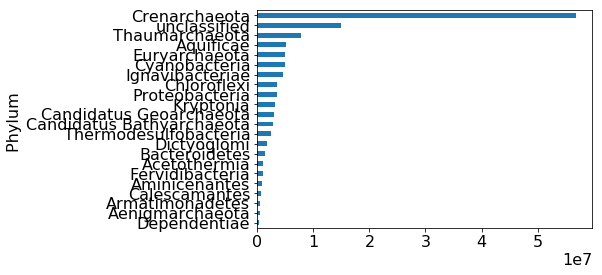

In [169]:
data.groupby('Phylum').sum()['Sequence Length'].sort_values(ascending=True).plot.barh(ax=ax3)
plt.show()

In [141]:
def tree_to_dict(nt, nd):
    for prop in nt.__dict__:
        if prop == 'children':
            continue
        elif prop.startswith('_'):
            continue
        if isinstance(getattr(nt, prop), set):
            nd[prop] = list(getattr(nt, prop))
        else:
            nd[prop] = getattr(nt, prop)

    nd['children'] = [{} for child in nt.children]
    for childt, childd in zip(nt.children, nd['children']):
        tree_to_dict(childt, childd)

nested = {}
tree_to_dict(sp_s, nested)
    

_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
name
_temp_faces
_faces
_children
_up
_dist
_support
_img_style
features
na

In [142]:
json.dumps(nested)

'{"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "Unassigned", "children": []}, {"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "Thermodesulforhabdus_norvegica", "children": []}, {"features": ["support", "dist", "name"], "name": "Unassigned", "children": []}]}]}, {"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "", "children": [{"features": ["support", "dist", "name"], "name": "Unassigned"

In [146]:
bla = json.load('Knumbers/KEGG_genomes/ial00001.json')

AttributeError: 'str' object has no attribute 'read'

In [4]:
import kpal as kp #this is a kmer toolkit (will work on this later, first continue with KEGG and trees)

In [80]:
# for separate obsidian pool files 
start_time = time.time()
for i in range(2,7):
    metadata = list(open('Checkm/obsidian_all_checkm/storage/bin_stats_ext.tsv'))
    metadata = [m.split('\n') for m in metadata]
    metadf = pd.DataFrame.from_records(metadata)
    metadf = metadf.drop(1,1)
    metadf.columns = ['bla']
    metadf = metadf['bla'].str.split('\t',1,expand=True)
    metadf = metadf.set_index(0)
    metadf.columns = ['metadata']

    columns = ['marker lineage','Completeness','Contamination','# contigs','Genome size','# genomes','# marker sets','# markers','# predicted genes','Coding density','GC','GC std','Longest contig','Mean contig length','N50 (contigs)']
    metadata_obs3 = pd.DataFrame(index=metadf.index,columns=columns)

    for d in metadf.index:
        dictionary = ast.literal_eval(metadf.ix[d,'metadata'])
        for j in metadata_obs3.columns:
            metadata_obs3.ix[d,j] = dictionary[j]
    if i == 2:        
        checkm_metadata = metadata_obs3
    else:
        checkm_metadata = checkm_metadata.append(metadata_obs3)
checkm_metadata.to_pickle('checkm_metadata_all_and_grouped')        
end_time = time.time()
print('bla took ' ,"%s"(end_time-start_time) ,'seconds')

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [111]:
checkm_metadata

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs)
0,,,,,,,,,,,,,,,
Obs2_meta_10,c__Thermoprotei,87.9747,1.26582,90,1251309,41,158,245,1390,0.887548,0.425312,0.0114084,68590,13903.4,15392
Obs2_meta_11,c__Thermoprotei,95.5696,1.58228,59,1598901,41,158,245,1849,0.900737,0.386731,0.0193057,154790,27100,46717
Obs2_meta_12,k__Archaea,91.1765,0.735294,138,1545921,59,136,174,1840,0.853313,0.544655,0.0365136,39190,11202.3,13047
Obs2_meta_13,c__Thermoprotei,95.2381,0,43,1324245,54,168,217,1499,0.914643,0.522533,0.0390523,155124,30796.4,57697
Obs2_meta_14,k__Bacteria,59.8276,9.24765,137,992079,5449,58,104,1097,0.955121,0.315248,0.0187612,20269,7241.45,6870
Obs2_meta_15,p__Euryarchaeota,94.5011,8.82353,117,1558455,95,153,228,1824,0.914184,0.425351,0.0222889,83441,13320.1,15889
Obs2_meta_16,k__Archaea,70.0935,0.934579,113,1011800,207,107,149,1181,0.90723,0.421466,0.0165255,19658,8953.98,9478
Obs2_meta_17,c__Thermoprotei,96.2025,0.949367,78,1586767,41,158,245,1684,0.912546,0.477539,0.0195547,130075,20343.2,33578
Obs4_mega_15,c__Thermoprotei,84.0506,0.949367,113,1122514,41,158,245,1189,0.88831,0.316349,0.0180656,33653,9933.75,11291


In [83]:
# combined
start_time = time.time()

metadata = list(open('Checkm/obsidian_all_checkm/storage/bin_stats_ext.tsv'))
metadata = [m.split('\n') for m in metadata]
metadf = pd.DataFrame.from_records(metadata)
metadf = metadf.drop(1,1)
metadf.columns = ['bla']
metadf = metadf['bla'].str.split('\t',1,expand=True)
metadf = metadf.set_index(0)
metadf.columns = ['metadata']

columns = ['marker lineage','Completeness','Contamination','# contigs','Genome size','# genomes','# marker sets','# markers','# predicted genes','Coding density','GC','GC std','Longest contig','Mean contig length','N50 (contigs)']
metadata_obs3 = pd.DataFrame(index=metadf.index,columns=columns)

for d in metadf.index:
    dictionary = ast.literal_eval(metadf.ix[d,'metadata'])
    for j in metadata_obs3.columns:
        metadata_obs3.ix[d,j] = dictionary[j]
checkm_metadata = metadata_obs3.copy()
checkm_metadata.to_pickle('checkm_metadata_all_and_grouped')        
end_time = time.time()
#print('bla took ' ,"%s"(end_time-start_time) ,'seconds')

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [ ]:
#checkm_metadata = pd.read_pickle('checkm_metadata')   
checkm_metadata.sort_values('Completeness',ascending=False)
checkm_metadata.loc['Obsidian6_metaSPAdes_11']

In [88]:
checkm10percent = checkm_metadata[checkm_metadata["Contamination"]<0.1].sort_values(by='Completeness',ascending=False)
checkm05percent = checkm_metadata[checkm_metadata["Contamination"]<5].sort_values(by='Completeness',ascending=False)
checkm05percent = checkm05percent[checkm05percent['Completeness']>10]#.loc['Obsidian4_group_M50']
#checkm05percent[checkm05percent['Completeness']>10].index
#checkm_metadata
checkm05percent.to_pickle('checkm_all_max5cont_min10comp')

In [107]:
import os
from os import listdir
from os.path import isfile, join

# after pruning (this is the above 'checkm_all_max5cont_min10comp')
metadata = pd.read_table('Checkm/pruned_obsidian/outputfile.txt')
metadata = metadata.set_index('Bin Id')
metadata.sort_values('Completeness',ascending=False)
good_genomes_obs = metadata[metadata['Strain heterogeneity']<1]
good_genomes_obs.sort_values('Completeness',ascending=False)
medium_heterogen_genomes = metadata[~metadata.index.isin(good_genomes_obs.index)]
good_genomes_obs.to_pickle('Obsidian_good_genomes')

mypath = 'fasta/checkm/max5pcont_min10pcomp/'
genomelist = [f[0:-6] for f in listdir(mypath) if isfile(join(mypath, f))]
genomelist
# move the selected fastas to a new folder 
"""for file in good_genomes_obs.index:
    oldpath = 'fasta/checkm/max5pcont_min10pcomp/'
    newpath = 'fasta/checkm/max5pcont_min10pcomp/good_genomes/'
    os.rename(oldpath+file+'.fasta', newpath+file+'.fasta')"""

FileNotFoundError: [Errno 2] No such file or directory: 'fasta/checkm/max5pcont_min10pcomp/M50.fasta' -> 'fasta/checkm/max5pcont_min10pcomp/good_genomes/M50.fasta'

In [109]:

medium_heterogen_genomes

,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
Bin Id,,,,,,,,,,,,,
M03,k__Bacteria (UID203),5449,104,58,77,25,2,0,0,0,30.96,2.59,100.00
M22,c__Thermoprotei (UID148),41,245,158,6,227,12,0,0,0,96.52,4.43,100.00
M38,p__Euryarchaeota (UID49),95,228,153,113,107,8,0,0,0,57.70,4.58,12.50
M58,k__Bacteria (UID203),5449,104,58,78,24,2,0,0,0,37.07,3.45,100.00
M65,k__Bacteria (UID203),5449,104,58,92,10,2,0,0,0,15.67,3.45,100.00
Obs2_mega_1,k__Bacteria (UID3060),138,336,246,20,312,4,0,0,0,93.90,1.32,25.00
Obs2_mega_10,k__Archaea (UID146),59,174,136,18,154,2,0,0,0,89.71,1.47,50.00
Obs2_mega_11,c__Thermoprotei (UID147),54,217,168,65,151,1,0,0,0,66.07,0.60,100.00
Obs2_mega_2,c__Thermoprotei (UID148),41,245,158,79,165,1,0,0,0,66.55,0.63,100.00


In [33]:

dictionary = ast.literal_eval(metadf.ix[0,'metadata'])
dictionary.keys()

dict_keys(['GC std', '# genomes', 'Genome size', 'Longest contig', 'GCN0', 'GCN1', 'GCN2', 'marker lineage', 'GC', 'GCN4', '# scaffolds', 'Completeness', 'GCN3', 'GCN5+', '# contigs', 'Translation table', '# markers', 'Coding density', 'Mean contig length', '# marker sets', 'N50 (contigs)', '1', '0', '3', '2', 'Longest scaffold', '4', '5+', 'Contamination', '# predicted genes', 'N50 (scaffolds)', '# ambiguous bases', 'Mean scaffold length'])

In [35]:
metadata_obs3

,# contigs,# genomes,# marker sets,# markers,# predicted genes,Coding density,Completeness,Contamination,GC,GC std,Genome size,Longest contig,Mean contig length,N50 (contigs),marker lineage
0,,,,,,,,,,,,,,,
Obsidian3_minimetagenomics_14,30,207,107,149,283,0.888382,8.8785,0.934579,0.434312,0.0134545,225644,14459,7521.47,7693,k__Archaea
Obsidian3_metaSPAdes_9,56,138,246,336,527,0.950512,27.4496,0,0.451648,0.0187746,426529,19186,7616.59,7927,k__Bacteria
Obsidian3_metaSPAdes_8,41,138,246,336,1663,0.951116,95.5285,0.50813,0.414727,0.010082,1547859,130665,37752.7,50453,k__Bacteria
Obsidian3_metaSPAdes_3,91,364,203,303,600,0.913561,15.353,0,0.350424,0.0215342,599971,11790,6593.09,6433,p__Bacteroidetes
Obsidian3_metaSPAdes_2,41,207,103,145,357,0.932843,24.7573,0,0.468953,0.0128764,290426,10688,7083.56,7081,k__Archaea
Obsidian3_metaSPAdes_1,117,433,183,273,2284,0.954421,94.6564,2.73224,0.38976,0.0145105,2367190,89819,20232.4,28786,k__Bacteria
Obsidian3_metaSPAdes_0,143,59,136,174,1454,0.908119,56.9853,1.10294,0.455763,0.0221093,1244386,26004,8702,8457,k__Archaea
Obsidian3_metaSPAdes_7,103,59,136,174,1680,0.900563,88.5417,0,0.610688,0.023879,1429183,75971,13875.6,16485,k__Archaea
Obsidian3_metaSPAdes_6,69,59,136,174,761,0.910424,39.5079,0,0.567829,0.026896,606993,20603,8797,9200,k__Archaea
